## Plot _Mycoplasma pneumoniae_ ribosomal proteins with extensions and supporting data on their structure and function

This script makes a figure with schematic representation of amino acid extensions in _M. pneumoniae_ ribosomal proteins and their structural and functional information. 

Required file in the _data_rp_sequences_ folder:

- rp_extensions20_allCN.fasta

Fasta file with amino acid sequences for ribosomal proteins with extensions > 20 amino acids as compared to _E. coli_ downloaded from NCBI (RefSeq)

- rp_extension_stats.csv

Extension table with information on extension lengths for the selected ribosomal proteins

- rp_xlink_information.csv

Information on cross links in ribosomal proteins from _O'Reilly & Xue et al, Science 2020_

- rp_jpred_prediction.fasta

Fasta file with secondary structure predictions by JPRED (https://www.compbio.dundee.ac.uk/jpred/)

- rp_iupred_disorder_scores.csv

File with disorder scores for each amino acid in ribosomal proteins predicted by IUPRED (https://iupred2a.elte.hu/)

- rp_TNins_mapping.csv

Positions of transposon insertions in ribosomal proteins from _Miravet-Verde et al., Nucleic Acids Research 2020_

Load the necessary libraries

In [1]:
from Bio import SeqIO             # biopython library for fastq Input/Output
from Bio.SeqRecord import SeqRecord # biopython library for storing sequence info
from Bio.Seq import Seq           # biopython library for sequence manipulations
import pandas as pd
import numpy as np
import os
import ast
import matplotlib.pyplot as plt
%matplotlib inline

Define a dictionary between COGs and ribosomal proteins

In [2]:
cog_rp_dict = {'COG0087': 'rpl3',
               'COG0088': 'rpl4',
               'COG0238': 'rps18',
               'COG0292': 'rpl20',
               'COG0091': 'rpl22',
               'COG0089': 'rpl23',
               'COG0255': 'rpl29',
               'COG0254': 'rpl31',
               'COG0052': 'rps2',
               'COG0092': 'rps3',
               'COG0098': 'rps5',
               'COG0360': 'rps6',
               'COG0099': 'rps18'}

File folder that contains input data for plotting

In [3]:
fileFolder = 'data_rp_sequences' + os.sep

Read Refseq annotation proteins that were selected from the extension analysis

In [4]:
fastaFileName = 'rp_extensions20_allCN.fasta'
# create an empty list of sequences
MPproteinFASTAseq = []
# read fasta file sequence by sequence and save to the list 
for seq_record in SeqIO.parse(fileFolder + fastaFileName, "fasta"):
    MPproteinFASTAseq.append(seq_record)
print('Read sequences of', len(MPproteinFASTAseq), 'proteins')

Read sequences of 11 proteins


Get protein IDs and COGs (in desciption)

In [5]:
seq_gene_id = []
for curprot_record in MPproteinFASTAseq:
    seq_gene_id.append(curprot_record.id)
# get RPL name COG from description
seq_gene_id_cog = [str(item.description[str(item.description).find('COG'):str(item.description).find('COG')+7])
                   for item in MPproteinFASTAseq]
seq_gene_id_rp = [cog_rp_dict[item] for item in seq_gene_id_cog]
seq_gene_id_rp_dict = dict(zip(seq_gene_id, seq_gene_id_rp))
seq_gene_rp_id_dict = dict(zip(seq_gene_id_rp,seq_gene_id))
seq_gene_id_cog_dict = dict(zip(seq_gene_id, seq_gene_id_cog))
seq_gene_cog_gene_id_dict = dict(zip(seq_gene_id_cog,seq_gene_id))

In [6]:
# Display dictionary ribosomal proteins - Refseq IDs
seq_gene_rp_id_dict

{'rps2': '272634.WP_010874565.1',
 'rpl3': '272634.WP_010874522.1',
 'rpl4': '272634.WP_010874523.1',
 'rpl23': '272634.WP_010874524.1',
 'rpl22': '272634.WP_015344888.1',
 'rps3': '272634.WP_010874528.1',
 'rpl31': '272634.WP_010874716.1',
 'rpl29': '272634.WP_010874530.1',
 'rps6': '272634.WP_010874585.1',
 'rps5': '272634.WP_010874539.1',
 'rps18': '272634.WP_010874587.1'}

In [7]:
# Display dictionary COG - Refseq IDs
seq_gene_cog_gene_id_dict

{'COG0052': '272634.WP_010874565.1',
 'COG0087': '272634.WP_010874522.1',
 'COG0088': '272634.WP_010874523.1',
 'COG0089': '272634.WP_010874524.1',
 'COG0091': '272634.WP_015344888.1',
 'COG0092': '272634.WP_010874528.1',
 'COG0254': '272634.WP_010874716.1',
 'COG0255': '272634.WP_010874530.1',
 'COG0360': '272634.WP_010874585.1',
 'COG0098': '272634.WP_010874539.1',
 'COG0238': '272634.WP_010874587.1'}

Read statistics on extended amino acids in ribosomal proteins
(length of C- and N-terminus extensions)

In [8]:
fileName = 'rp_extension_stats.csv'
mpn_extended_seqs_NCaa = pd.read_csv(fileFolder + fileName, index_col=0)
# replace NA with 0
mpn_extended_seqs_NCaa = mpn_extended_seqs_NCaa.fillna(0)

Read information on cross-links

In [9]:
fileName = 'rp_xlink_information.csv'
rp_link_df = pd.read_csv(fileFolder + fileName)

Read JPRED secondary structure prediction for each amino acid in the sequence

In [10]:
fileName = 'rp_jpred_prediction.fasta'
# create an empty list of sequences
rp_jpred_seqs = []
# read fasta file sequence by sequence and save to the list 
for seq_record in SeqIO.parse(fileFolder + fileName, "fasta"):
    rp_jpred_seqs.append(seq_record)
print('Read secondary structure prediction for', 
      len(rp_jpred_seqs), 'proteins')

Read secondary structure prediction for 11 proteins


Read IUPRED disorder scores for each amino acid in the sequence

In [11]:
fileName = 'rp_iupred_disorder_scores.csv'
file = open(fileFolder + fileName, "r")
contents = file.read()
rp_disorder = ast.literal_eval(contents)
file.close()

for item in rp_disorder.keys():
    rp_disorder[item] = np.fromstring(rp_disorder[item].strip('[]'),
                                      dtype=float, sep=' ')

Read coordinates of transposon insertions in ribosomal proteins.

In [12]:
fileName = 'rp_TNins_mapping.csv'
rp_TNins = pd.read_csv(fileFolder + fileName)

#### Plot ribosomal proteins and structural information

In [13]:
#Define the order of proteins to plot
plot_proteins = ['rps2', 'rps3', 'rps5', 'rps6', 'rps18',
                 'rpl3', 'rpl4', 'rpl22', 'rpl23', 'rpl29', 'rpl31']
plot_proteins = plot_proteins[::-1]

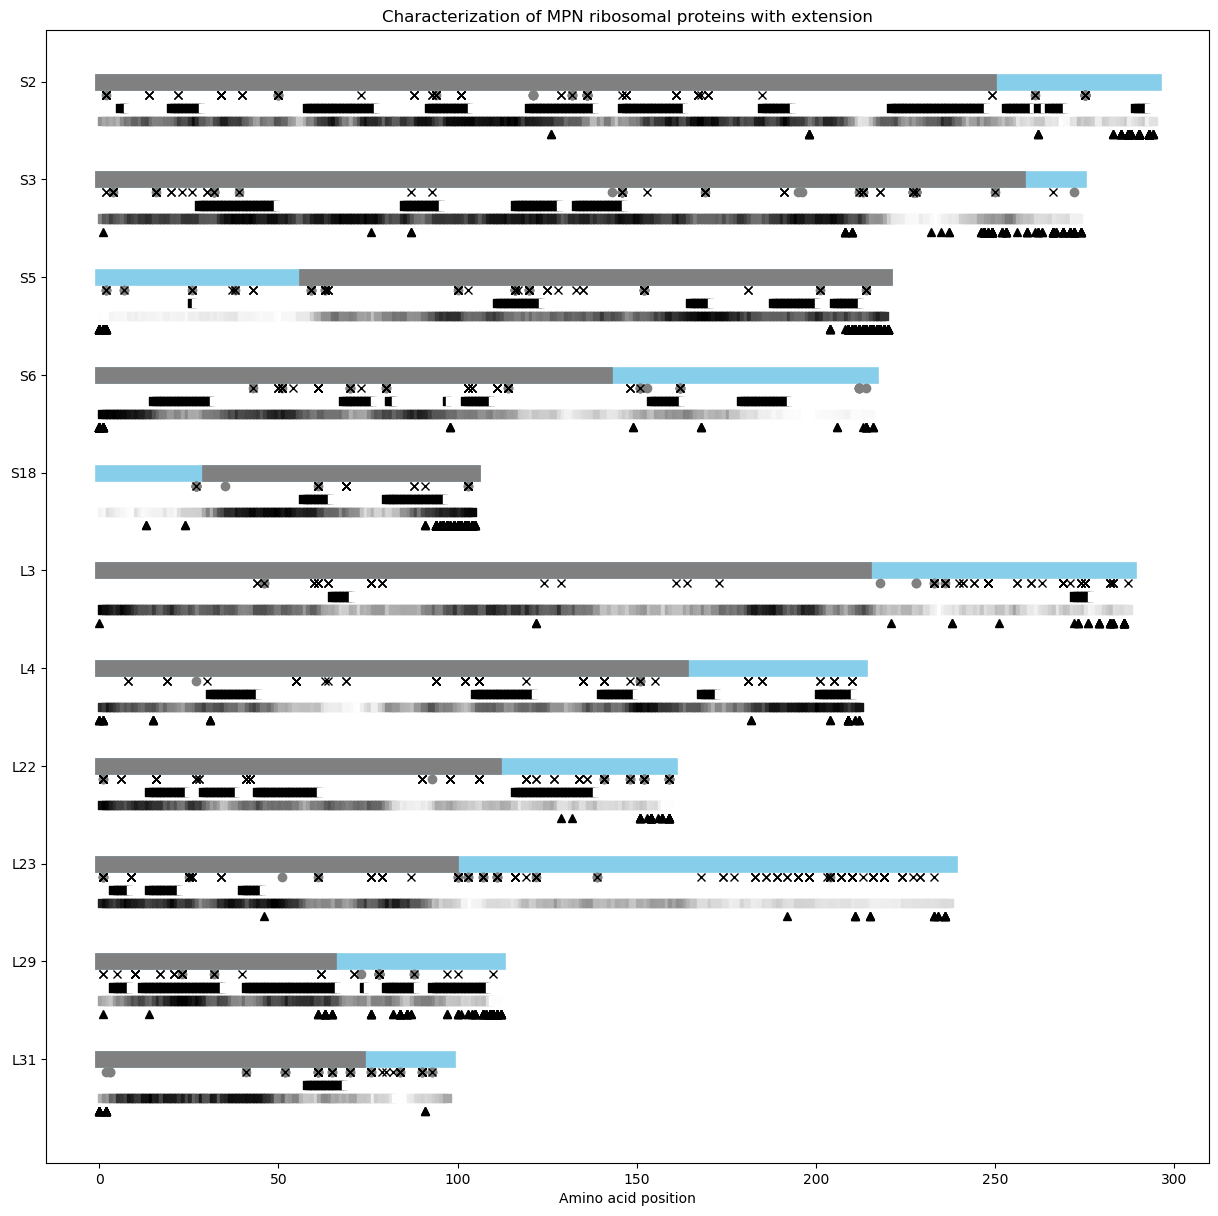

In [14]:
plt.figure(figsize=(15,15), dpi=100)
plotnames = []
pltidx = 1
plt_offset=0.4
for prot_interest in plot_proteins:
    
    # get PPIs
    linkType = 'Internal' #'Between'
    prot_dsso1 = rp_link_df[(rp_link_df['Description1']==prot_interest) & 
                          (rp_link_df['fdrGroup']==linkType)]
    prot_dsso2 = rp_link_df[(rp_link_df['Description2']==prot_interest) & 
                          (rp_link_df['fdrGroup']==linkType)]
    
    linkType = 'Between'
    prot_dsso_ext1 = rp_link_df[(rp_link_df['Description1']==prot_interest) & 
                              (rp_link_df['fdrGroup']==linkType)]
    prot_dsso_ext2 = rp_link_df[(rp_link_df['Description2']==prot_interest) & 
                              (rp_link_df['fdrGroup']==linkType)]
   
    # get seq
    curseqname = [item for item in seq_gene_id_rp_dict.keys() 
                  if seq_gene_id_rp_dict[item]==prot_interest][0]
    
    mpn_len = [len(item.seq) for item in MPproteinFASTAseq 
               if (item.id==curseqname)][0]
    mpn_coord = [1, mpn_len]
    
    
    curid = prot_interest.replace('rp','').upper()
    mpn_Caa = mpn_extended_seqs_NCaa.loc[curid,
                                         'Length of C-extension in MPN']
    mpn_Naa = mpn_extended_seqs_NCaa.loc[curid,
                                         'Length of N-extension in MPN']
    
    ecoli_coord = [1+mpn_Naa,mpn_len-mpn_Caa]
    
    plt.plot(mpn_coord, [pltidx,pltidx], 'skyblue', linewidth=12)
    plt.plot(ecoli_coord, [pltidx,pltidx], 'gray', linewidth=12)


    plotdata = prot_dsso_ext1['fromSite']
    plotdatadesc = prot_dsso_ext1['Description2']
    plt.plot(plotdata, (pltidx-plt_offset)*np.ones(np.shape(plotdata)), 'o',  color='gray')

    plotdata = prot_dsso_ext2['ToSite']
    plotdatadesc = prot_dsso_ext2['Description1']
    plt.plot(plotdata, (pltidx-plt_offset)*np.ones(np.shape(plotdata)), 'o',  color='gray')

    plotdata = prot_dsso1['fromSite']
    plotdatadesc = prot_dsso1['Description2']
    plt.plot(plotdata, (pltidx-plt_offset)*np.ones(np.shape(plotdata)), 'x',  color='black')

    plotdata = prot_dsso2['ToSite']
    plotdatadesc = prot_dsso2['Description1']
    plt.plot(plotdata, (pltidx-plt_offset)*np.ones(np.shape(plotdata)), 'x',  color='black')

    ##########################################################
    # JPRED
    # get structure prediction
    cur_jpred = [rp_jpred_seqs[i] for i in range(len(rp_jpred_seqs)) 
                 if rp_jpred_seqs[i].id==prot_interest]
    cur_jpred = str(cur_jpred[0].seq)
    
    plotdata = [1 if cur_jpred[i]=='H' else 0 
                for i in range(len(cur_jpred))]
    plotdatadesc = 'H'
    plt.scatter(range(1,len(plotdata)+1), 
                (pltidx-plt_offset*2)*np.ones(np.shape(plotdata)), 
                c=plotdata, 
                marker = 's', cmap='Greys')#'flag_r')#'Reds')

    ##########################################################
    # get disorder scores
    curdisorder = rp_disorder[prot_interest]
    # binarize disorder
    #curdisorder = [1 if curdisorder[i]>0.5 else 0 for i in range(len(curdisorder))]
    plotdata = np.asarray(curdisorder)
    plt.scatter(range(1,len(plotdata)+1), (pltidx-plt_offset*3)*np.ones(np.shape(plotdata)), c=plotdata, 
                marker = 's', cmap='Greys_r')#'binary_r')#'gnuplot')#'viridis')
    ##########################################################

    ##########################################################
    # TNSEQ ESSENTIALITY
    # get PATRIC coordinates
        
    curTNins = rp_TNins[rp_TNins['RP']==prot_interest].copy()
    curTNins = curTNins.sort_values(by=['FromStart_aa'])
    plotdata = curTNins['FromStart_aa']
    plt.plot(plotdata, (pltidx-plt_offset*4)*np.ones(np.shape(plotdata)), 
             '^',  color='black')
    ##########################################################
    
    pltidx = pltidx+3
    plotnames.append(prot_interest.replace('rp','').upper())
plt.yticks(range(1,len(plotnames)*3+1,3), plotnames)
plt.xlabel('Amino acid position')
plt.title('Characterization of MPN ribosomal proteins with extension');

plt.rcParams['svg.fonttype'] = 'none'
filename = 'suppl_fig_1_RPs_with_extensions_and_info'

# save figure to file
plt.savefig(filename + '.svg',
            format='svg',
            bbox_inches='tight')
plt.savefig(filename + '.png',
            format='png',
            bbox_inches='tight')

In [15]:
#Print information about used packages
import pkg_resources
import sys

In [16]:
# get biopython version
import pydoc
import Bio
strhelp = pydoc.render_doc(Bio, "Help on %s")

versionstring = 'a\x08ar\x08rg\x08gs\x08s\n\nV\x08VE\x08ER\x08RS\x08SI\x08IO\x08ON\x08N\n'
strhelp = strhelp[strhelp.find(versionstring) + len(versionstring):]
strhelp = strhelp.split('\n')[0]

In [17]:
#print package versions
print('Sesssion info:')
print('Python: ', sys.version)
print('numpy: ', pkg_resources.get_distribution('numpy').version)
print('pandas: ', pkg_resources.get_distribution('pandas').version)
print('matplotlib: ', pkg_resources.get_distribution('matplotlib').version)
print('Biopython: ', strhelp)

Sesssion info:
Python:  3.7.7 (default, Apr 15 2020, 05:09:04) [MSC v.1916 64 bit (AMD64)]
numpy:  1.18.1
pandas:  1.0.3
matplotlib:  3.1.3
Biopython:      1.76
